In [2]:
!git clone https://github.com/Dinhthixuanbinh/gender_datasets.git

In [ ]:
import os
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential,load_model,save_model
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from keras.layers import BatchNormalization
from keras.optimizers import Adam

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
      rotation_range=25,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [4]:
batch_size = 64
target_size = (64, 64)
input_shape=(64, 64, 3)
seed=1337
adam = 0.001
fre= -20
FC = 2048
E = 1
patience = 3
verbose = 1
factor = 0.50
min_lr = 0.0001
steps_per_epoch=256
validation_steps=256
epochs=8

In [5]:
test_datagen = ImageDataGenerator( rescale = 1.0/255)

train_generator = train_datagen.flow_from_directory('./dataset/Train/',
                                                    batch_size =batch_size,
                                                    class_mode = 'binary',
                                                    seed=seed,
                                                    target_size = target_size )     

validation_generator =  test_datagen.flow_from_directory( './dataset/Validation/',
                                                          batch_size  = batch_size,
                                                          class_mode  = 'binary',
                                                          seed=seed,
                                                          target_size = target_size)

Found 160000 images belonging to 2 classes.
Found 22598 images belonging to 2 classes.


In [6]:
train_generator

In [63]:
base_model = tf.keras.applications.VGG16(input_shape=input_shape,include_top=False,weights="imagenet")

In [64]:
for layer in base_model.layers[:fre]:
    layer.trainable=False

In [65]:
model=Sequential()
model.add(base_model)
model.add(layers.Dropout(.2))

model.add(Conv2D(512, (3, 3),strides=(1,1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(layers.Dropout(.1))
model.add(Conv2D(128, (3, 3),strides=(1,1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(layers.Dropout(.1))
model.add(Conv2D(384, (3, 3),strides=(1,1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(layers.Dropout(.1))
model.add(Conv2D(384, (3, 3),strides=(1,1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(layers.Dropout(.1))
model.add(Conv2D(500, (3, 3),strides=(1,1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,strides=(2,2), padding='same'))



In [66]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 dropout_37 (Dropout)        (None, 2, 2, 512)         0         
                                                                 
 conv2d_25 (Conv2D)          (None, 2, 2, 512)         2359808   
                                                                 
 batch_normalization_25 (Bat  (None, 2, 2, 512)        2048      
 chNormalization)                                                
                                                                 
 dropout_38 (Dropout)        (None, 2, 2, 512)         0         
                                                                 
 conv2d_26 (Conv2D)          (None, 2, 2, 128)         589952    
                                                      

In [67]:
model.add(Flatten())
model.add(Dense(FC , activation='relu'))
model.add(layers.Dropout(.2))
model.add(Dense(FC , activation='relu'))
model.add(layers.Dropout(.2))
model.add(Dense(FC, activation='relu'))
model.add(layers.Dropout(.2))
model.add(Dense(E, activation='sigmoid'))

In [68]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 dropout_37 (Dropout)        (None, 2, 2, 512)         0         
                                                                 
 conv2d_25 (Conv2D)          (None, 2, 2, 512)         2359808   
                                                                 
 batch_normalization_25 (Bat  (None, 2, 2, 512)        2048      
 chNormalization)                                                
                                                                 
 dropout_38 (Dropout)        (None, 2, 2, 512)         0         
                                                                 
 conv2d_26 (Conv2D)          (None, 2, 2, 128)         589952    
                                                      

In [69]:
model.compile(optimizer=Adam(adam),
              loss='binary_crossentropy'
              ,metrics=['accuracy'])

In [70]:
lrd = ReduceLROnPlateau(monitor = 'val_loss',
                        patience = patience,
                        verbose = verbose ,
                        factor = factor,
                        min_lr = min_lr)
mcp = ModelCheckpoint('model.h5')
es = EarlyStopping(verbose=verbose, patience=patience)

In [71]:
hist = model.fit_generator(generator=train_generator,
                           validation_data=validation_generator,
                           steps_per_epoch=steps_per_epoch,
                           validation_steps=validation_steps,
                           epochs=epochs,
                           callbacks=[lrd,mcp, es])

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6280\2215797633.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(generator=train_generator,


Epoch 1/8
256/256 [==============================] - 849s 3s/step - loss: 0.7572 - accuracy: 0.5878 - val_loss: 1.2959 - val_accuracy: 0.3857 - lr: 0.0010
Epoch 2/8
256/256 [==============================] - 847s 3s/step - loss: 0.5547 - accuracy: 0.7229 - val_loss: 0.8666 - val_accuracy: 0.6938 - lr: 0.0010
Epoch 3/8
256/256 [==============================] - 844s 3s/step - loss: 0.4523 - accuracy: 0.7910 - val_loss: 0.3849 - val_accuracy: 0.8675 - lr: 0.0010
Epoch 4/8
256/256 [==============================] - 911s 4s/step - loss: 0.3019 - accuracy: 0.8745 - val_loss: 0.2192 - val_accuracy: 0.9143 - lr: 0.0010
Epoch 5/8
256/256 [==============================] - 880s 3s/step - loss: 0.2496 - accuracy: 0.8982 - val_loss: 0.1698 - val_accuracy: 0.9346 - lr: 0.0010
Epoch 6/8
256/256 [==============================] - 846s 3s/step - loss: 0.2179 - accuracy: 0.9138 - val_loss: 0.1771 - val_accuracy: 0.9342 - lr: 0.0010
Epoch 7/8
256/256 [==============================] - 924s 4s/step - lo

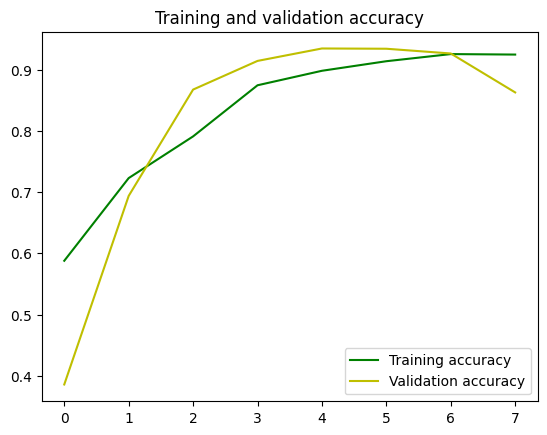

<Figure size 640x480 with 0 Axes>

In [72]:
import matplotlib.pyplot as plt
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'y', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()